* Branden Frieden, Whitney Kenner, Mack Tawa, Felix Ye, Howard Tung
* CS 6017
* 7/20/23
* movies lab

In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt


### Task 1: Read the data in and convert each line into a JSON object.  Store each of these "movie" objects in a list.

In [2]:
imdb = open("imdbClean.json", errors="ignore")

lines = imdb.readlines()
movies = []

for line in lines:
    line = line.strip()
    try:
        movies.append(json.loads(line))
    except json.JSONDecodeError:
        pass
    
print(len(movies))

115056


### Task 2: Filter the data to keep only the movies made in the US.

In [3]:
USMovies = []
for movie in movies:
    if movie.get("Country") == None: continue
    if "USA" in movie.get("Country"):
        USMovies.append(movie)
print(len(USMovies))

46592


# Step 2: Kevin Bacon

In [4]:
graph = nx.Graph()

USMovies100 = USMovies[:100]

for movie in USMovies:
    if movie.get("Actors") == "N/A":
        continue
    actors = movie.get("Actors").split(", ")
    for actor in actors:
        if not graph.has_node(actor):
            graph.add_node(actor, movieNum = 1)
        else:
            graph.nodes[actor]["movieNum"] = graph.nodes[actor]["movieNum"] + 1
    for actor in actors:
        for costar in actors:
            if actor == costar:
                continue
            if not graph.has_edge(actor, costar):
                graph.add_edge(actor, costar)



In [5]:
# actor with the most moives
mostMovies = 0
mostActor = ""

for node in graph.nodes:
    if graph.nodes[node]["movieNum"] > mostMovies:
        mostMovies = graph.nodes[node]["movieNum"]
        mostActor = node

print("actor with the most moives is ", mostActor, " who was in ", mostMovies, " movies")

actor with the most moives is  Oliver Hardy  who was in  264  movies


In [6]:
print("Kevin Bacon was in ", graph.nodes["Kevin Bacon"]["movieNum"], " movies")

Kevin Bacon was in  57  movies


In [7]:
print("Kevin Bacon had ", graph.degree("Kevin Bacon"), " costars") 

Kevin Bacon had  127  costars


In [8]:
degrees = []
for _, degree in list( nx.degree( graph ) ):
    degrees.append( degree )

degrees.sort()
median = degrees[len(degrees)//2]
print("median numbeer of costars is ", median)

median numbeer of costars is  3


In [9]:
degrees_6 = True
counterExamples = []
degreesOfSeperation = []
for node in graph.nodes:
    if nx.has_path(graph, node, "Kevin Bacon"):
        if len(nx.shortest_path(graph, node, "Kevin Bacon")) <= 6:
            degreesOfSeperation.append(len(nx.shortest_path(graph, node, "Kevin Bacon")))
            continue
        else: 
            degrees_6 = False
            counterExamples.append((node, len(nx.shortest_path(graph, node, "Kevin Bacon"))))
            degreesOfSeperation.append(len(nx.shortest_path(graph, node, "Kevin Bacon")))
    else: 
        degrees_6 = False
        counterExamples.append((node, "no Path"))

print("the rumor that all actors are 6 degrees away from Kevin Bacon is", str(degrees_6))
print("counter Examples: ")
display(counterExamples)


the rumor that all actors are 6 degrees away from Kevin Bacon is False
counter Examples: 


[('John Fiorella', 'no Path'),
 ('Brian C. Bethel', 'no Path'),
 ('Paul Hasenyager', 'no Path'),
 ('Anthony Heartley', 'no Path'),
 ('Kyle Billeter', 'no Path'),
 ('Glenn Leftwich', 'no Path'),
 ('Lawrence Wiencek', 'no Path'),
 ('DaNae West', 'no Path'),
 ('Salam Fayyad', 'no Path'),
 ('Mahmoud Abbas', 'no Path'),
 ('Tzipi Livni', 'no Path'),
 ('Avi Dichter', 'no Path'),
 ('Jacqueline Bowman', 'no Path'),
 ('Velina Georgi', 'no Path'),
 ('Zorikh Lequidre', 'no Path'),
 ('Oscar Lowe', 'no Path'),
 ('Patrick Baran', 'no Path'),
 ('John Beers', 'no Path'),
 ('Chris Farina', 'no Path'),
 ('Tyler Magill', 'no Path'),
 ('Stacy Dunn', 'no Path'),
 ('Cindy Oliver', 'no Path'),
 ('Cody Oliver', 'no Path'),
 ('James Oliver', 'no Path'),
 ('Younger Oliver', 'no Path'),
 ('Tomata Du Plenty', 'no Path'),
 ('Dino Lee', 'no Path'),
 ('Helen Heaven', 'no Path'),
 ('Sheela Edwards', 'no Path'),
 ('Drew Bolduc', 'no Path'),
 ('Colleen Walsh', 'no Path'),
 ('Cody Crenshaw', 'no Path'),
 ('Kenneth Hall',

(array([1.2800e+02, 3.0420e+03, 1.4823e+04, 1.3303e+04, 4.1640e+03,
        8.9200e+02, 3.8000e+01, 1.7000e+01, 6.0000e+00, 9.0000e+00]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

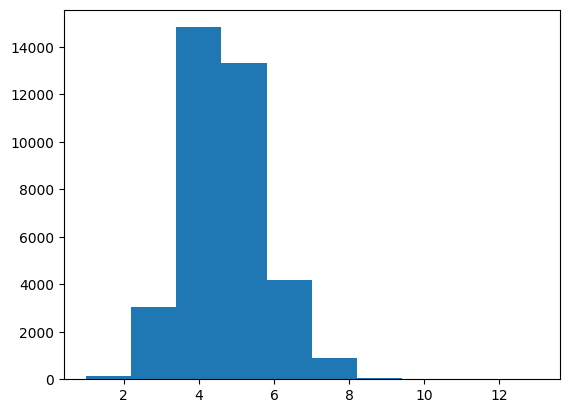

In [10]:
plt.hist(degreesOfSeperation)

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 15,
 15,
 17,
 18,
 18,
 21,
 24,
 24,
 24,
 29,
 29,
 29,
 30,
 30,
 32,
 33,
 33,
 33,
 38,
 38,
 38,
 39,
 39,
 39,
 39,
 40,
 42,
 42,
 44,
 44,
 44,
 45,
 47,
 50,
 51,
 51,
 52,
 52,
 54,
 56,
 56,
 57,
 58,
 59,
 59,
 60,
 60,
 62,
 62,
 63,
 63,
 63,
 63,
 63,
 64,
 64,
 65,
 69,
 73,
 74,
 75,
 76,
 76,
 76,
 77,
 77,
 77,
 79,
 80,
 80,
 80,
 84,
 84,
 85,
 85,
 90,
 90,
 93,
 97,
 98,
 100,
 103,
 103,
 112,
 114,
 119,
 120,
 121,
 129,
 145,
 150,
 178]

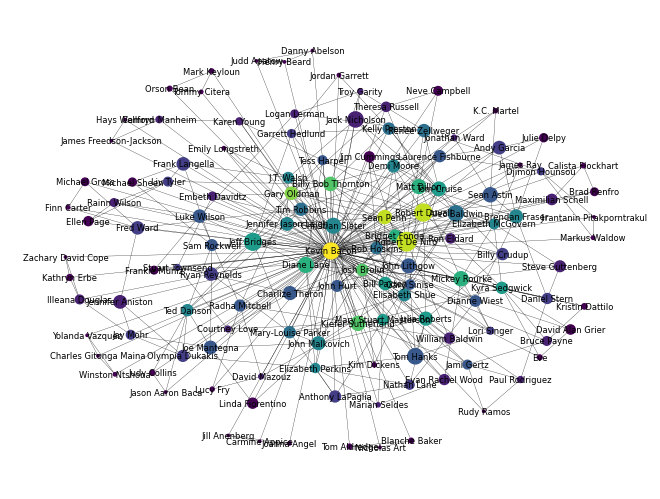

In [11]:
import numpy as np

graph.add_edge("Kevin Bacon", "Kevin Bacon")
subGraph = nx.subgraph(graph, graph.neighbors("Kevin Bacon") )

pos = nx.spring_layout(subGraph)

subDegrees = subGraph.degree()
fullDegrees = graph.degree()

n_color = [subDegrees[n] for n in subGraph.nodes]
size = [fullDegrees[n] for n in subGraph.nodes]

display(sorted(size))

nx.draw(subGraph, pos = pos, with_labels=True, node_color = n_color, node_size=size, font_size=6, width=.2, cmap='viridis', vmax=14)


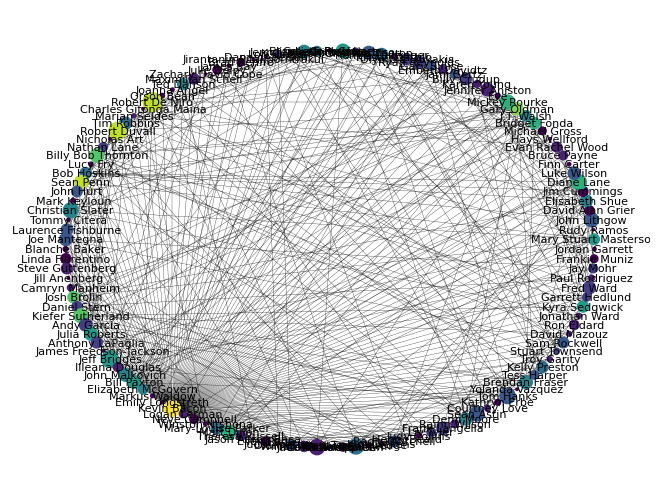

In [12]:
pos = nx.circular_layout(subGraph)
nx.draw(subGraph, pos = pos, with_labels=True, node_color = n_color, node_size=size, font_size=8, width=.2, cmap='viridis', vmax=14)

In [13]:
pageRanks = sorted(nx.pagerank(graph).items(), key=lambda x:x[1])
topBottomRanks = pageRanks[:5] + pageRanks[-5:][::-1]
display(topBottomRanks)

[('Stacy Dunn', 3.0402742287793097e-06),
 ('Lynnanne Zager', 3.0402742287793097e-06),
 ('Ramiro Gomez', 3.0402742287793097e-06),
 ('Milton S. Eisenhower', 3.0402742287793097e-06),
 ('Viola Dees', 3.0402742287793097e-06),
 ('Oliver Hardy', 0.0003627219646454787),
 ('Harry Carey', 0.00030627043228688075),
 ('John Wayne', 0.00028459278638466953),
 ('Steven Seagal', 0.0002713117656222533),
 ('Mickey Rooney', 0.00025806365584250015)]

Page rank gives us the most consequential and connected actors (those with very low values) and the least connected actors (those with very high values)